In [1]:
!pip install twilio

  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.8.1
    Uninstalling aiohttp-3.8.1:
      Successfully uninstalled aiohttp-3.8.1


In [2]:
# Mock implementation for sending alerts (example with Twilio)
# Install Twilio: !pip install twilio

from twilio.rest import Client

# Twilio credentials (replace with your credentials)
account_sid = 'Suhel'
auth_token = '69419'
client = Client(account_sid, auth_token)

def send_alert(message, to_phone_number):
    from_phone_number = '6503835249'
    message = client.messages.create(
        body=message,
        from_=from_phone_number,
        to=to_phone_number
    )
    return message.sid

# Example alert
alert_message = "Heatwave Alert! Temperatures are expected to exceed 30°C today. Stay hydrated and indoors."
to_phone_number = '+123456789'  # Replace with the recipient's phone number

# Send alert (uncomment to send)
# alert_sid = send_alert(alert_message, to_phone_number)
# print(f"Alert sent with SID: {alert_sid}")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Sample data: Load your weather data here
data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
weather_data = pd.read_csv(data_url, parse_dates=['Date'])

# Preprocessing: Add a 'Heatwave' column based on a temperature threshold
weather_data['Year'] = weather_data['Date'].dt.year
weather_data['Month'] = weather_data['Date'].dt.month
weather_data['Day'] = weather_data['Date'].dt.day

# Define a heatwave as a day with a temperature above 30 degrees Celsius (example threshold)
weather_data['Heatwave'] = weather_data['Temp'] > 30

# Display the first few rows of the dataframe
weather_data.head()

C:\Users\ssidh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Date,Temp,Year,Month,Day,Heatwave
0,1981-01-01,20.7,1981,1,1,False
1,1981-01-02,17.9,1981,1,2,False
2,1981-01-03,18.8,1981,1,3,False
3,1981-01-04,14.6,1981,1,4,False
4,1981-01-05,15.8,1981,1,5,False


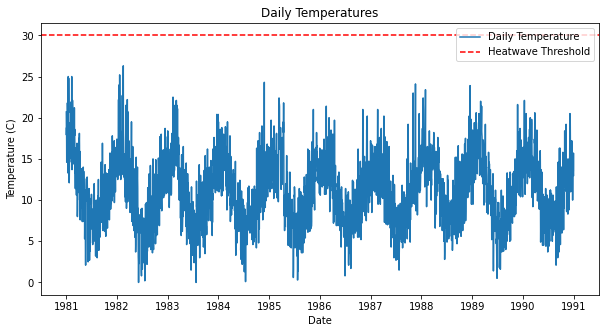

In [4]:
# Plot the temperature data
plt.figure(figsize=(10, 5))
plt.plot(weather_data['Date'], weather_data['Temp'], label='Daily Temperature')
plt.axhline(y=30, color='r', linestyle='--', label='Heatwave Threshold')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Daily Temperatures')
plt.legend()
plt.show()



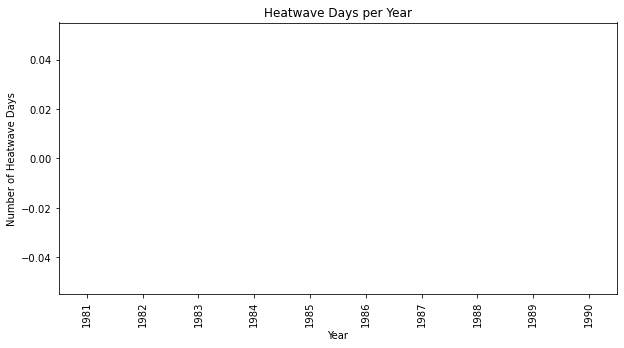

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming weather_data is a DataFrame with 'Year' and 'Heatwave' columns
#weather_data = pd.read_csv('your_weather_data.csv')

# Group by 'Year' and sum up the 'Heatwave' days
heatwave_days_per_year = weather_data.groupby('Year')['Heatwave'].sum()

# Plotting the data
heatwave_days_per_year.plot(kind='bar', figsize=(10, 5), title='Heatwave Days per Year')
plt.xlabel('Year')
plt.ylabel('Number of Heatwave Days')
plt.title('Heatwave Days per Year')
plt.show()


In [9]:
# Prepare the dataset for modeling
features = weather_data[['Year', 'Month', 'Day', 'Temp']]
target = weather_data['Heatwave']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       730

    accuracy                           1.00       730
   macro avg       1.00      1.00      1.00       730
weighted avg       1.00      1.00      1.00       730



In [10]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Generate dates
start_date = datetime(2020, 1, 1)
end_date = datetime(2022, 12, 31)
date_range = pd.date_range(start=start_date, end=end_date)

# Generate random temperature, humidity, wind speed, and pressure data
data = {
    'Date': date_range,
    'Temp': np.random.randint(20, 40, size=len(date_range)),
    'Humidity': np.random.randint(40, 80, size=len(date_range)),
    'WindSpeed': np.random.randint(0, 20, size=len(date_range)),
    'Pressure': np.random.randint(1000, 1020, size=len(date_range))
}

# Create DataFrame
weather_data = pd.DataFrame(data)

# Simulate heatwave days (assuming temperature threshold of 30°C)
weather_data['Heatwave'] = (weather_data['Temp'] > 30).astype(int)

# Save DataFrame to CSV
weather_data.to_csv('weather_data.csv', index=False)

# Display sample of generated data
print(weather_data.head())


        Date  Temp  Humidity  WindSpeed  Pressure  Heatwave
0 2020-01-01    36        64         19      1013         1
1 2020-01-02    39        44          6      1018         1
2 2020-01-03    36        49         17      1006         1
3 2020-01-04    23        66          5      1014         0
4 2020-01-05    33        67         13      1004         1


In [12]:
import pandas as pd

# Load weather data
weather_data = pd.read_csv('weather_data.csv')

# Convert 'Date' column to datetime format
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

# Extract year, month, day from 'Date'
weather_data['Year'] = weather_data['Date'].dt.year
weather_data['Month'] = weather_data['Date'].dt.month
weather_data['Day'] = weather_data['Date'].dt.day

# Define heatwave threshold (e.g., 30°C)
heatwave_threshold = 30
weather_data['Heatwave'] = weather_data['Temp'] > heatwave_threshold


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare features and labels
features = weather_data[['Temp', 'Humidity', 'WindSpeed', 'Pressure']]  # Example features
labels = weather_data['Heatwave']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        92

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220

